<a href="https://colab.research.google.com/github/fauk74/Machine-Learning/blob/main/Upper_Confidence_Bound_vs_Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
#This is a simulation is row is simulating an user and the ads he/she is seeing , the table is showing what it is clicked
dataset = pd.read_csv('https://raw.githubusercontent.com/fauk74/Dataset/main/Ads_CTR_Optimisation.csv')

In [ ]:
dataset.shape

(10000, 10)

In [ ]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
import math

N=700  #number of users -fixed
d=10 #number of ads - fixed

ads_selected=[] #dinamic list
number_of_selections =[0]*d  #each time we increase by 1
sums_of_rewards=[0] * d
total_reward=0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (number_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    ads_selected.append(ad)
    number_of_selections[ad] = number_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward


## Visualising the results

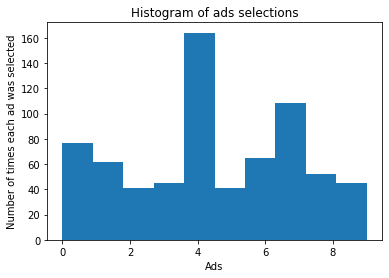

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# Thompson Sampling

In [ ]:
# Step 1 at each round we consider two numbers for each ad i:
#N1i(n) = the number of the times the ad i got reward 1 up to round n
#N0i(n) = the number of the times the ad i got reward 0 up to round n

#Step 2 for each ad i we take a random draw from the beta-variate distribution 

#Step 3 We select the ad that has the highest random draw





[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
#initialisation
import random

N=500
d=10
ads_selected=[]
n_rewards_1=[0]*d#  = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
n_rewards_0=[0]*d
total_reward=0




In [ ]:
for n in range(0,N):
  ad = 0
  max_random=0
  for i in range(0, d):
    random_beta=random.betavariate(n_rewards_1[i]+1, n_rewards_0[i]+1) # Step 2
    if random_beta > max_random : 
      ad=i
      max_random=random_beta

  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 0: n_rewards_0[ad]+=1
  else:
      n_rewards_1[ad]+=1
  total_reward+=reward

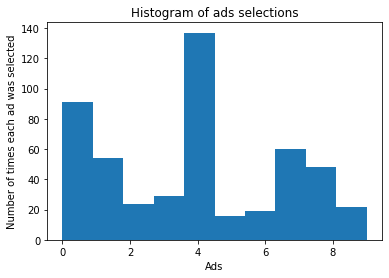

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [ ]:
#It can be seen, by running the two models sevral times, that visually the solution with Tohompson Sampling gets sooner to the solution
#It should be done some curve to visualize this 